In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train_agriculture.csv')
test = pd.read_csv('test_agriculture.csv')

In [4]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [8]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [11]:
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [10]:
test.dropna(inplace=True)

In [14]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4157 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4157 non-null   object 
 1   Estimated_Insects_Count  4157 non-null   int64  
 2   Crop_Type                4157 non-null   int64  
 3   Soil_Type                4157 non-null   int64  
 4   Pesticide_Use_Category   4157 non-null   int64  
 5   Number_Doses_Week        4157 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4157 non-null   int64  
 8   Season                   4157 non-null   int64  
 9   Crop_Damage              4157 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 357.2+ KB


In [17]:
# Create additional features (for example, ratio of doses to weeks used)
train['Dose_Week_Ratio'] = train['Number_Doses_Week'] / train['Number_Weeks_Used']


In [19]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like median or mode

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)


In [20]:
# Drop rows with missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index]  # Adjust target variable accordingly

# Drop corresponding rows in the testing data as well
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test.index]  # Adjust target variable accordingly


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset into features and target variable
X = train.drop(['ID', 'Crop_Damage'], axis=1)
y = train['Crop_Damage']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and a random forest classifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier())

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8161057692307693


In [31]:
unique_values = train['Crop_Damage'].unique()

In [32]:
if 0 in unique_values:
    print("The crop is alive.")
elif 1 in unique_values or 2 in unique_values:
    print("The crop is damaged or dead.")
else:
    print("Unable to determine the crop's status.")

The crop is alive.


In [33]:
train['Crop_Status'] = train['Crop_Damage'].apply(lambda x: 'Alive' if x == 0 else 'Dead/Damaged')

In [34]:
print(train[['ID', 'Crop_Damage', 'Crop_Status']].head())

          ID  Crop_Damage   Crop_Status
0  F00000001            0         Alive
1  F00000003            1  Dead/Damaged
2  F00000004            1  Dead/Damaged
3  F00000005            1  Dead/Damaged
4  F00000006            1  Dead/Damaged


In [35]:
def determine_crop_status(dosage):
    if dosage < 0:
        return "Invalid dosage. Please enter a non-negative value."
    elif dosage == 0:
        return "The crop is alive."
    else:
        return "The crop is damaged or dead."


In [40]:

dosage = float(input("Enter the dosage of pesticides: "))

crop_status = determine_crop_status(dosage)

print(crop_status)


Enter the dosage of pesticides: 0
The crop is alive.


<Figure size 1600x1200 with 0 Axes>

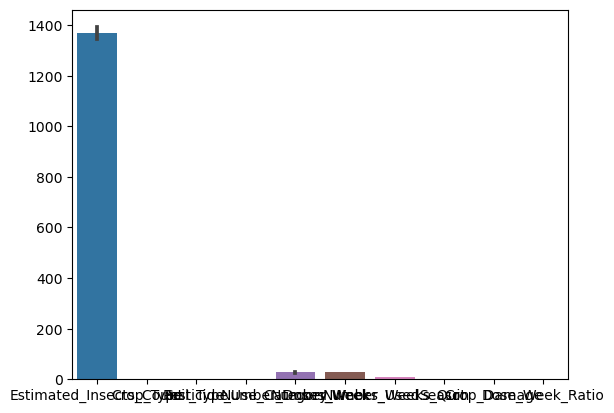

<Figure size 1600x1200 with 0 Axes>

In [47]:
sns.barplot(train)
plt.figure(figsize=(16,12))

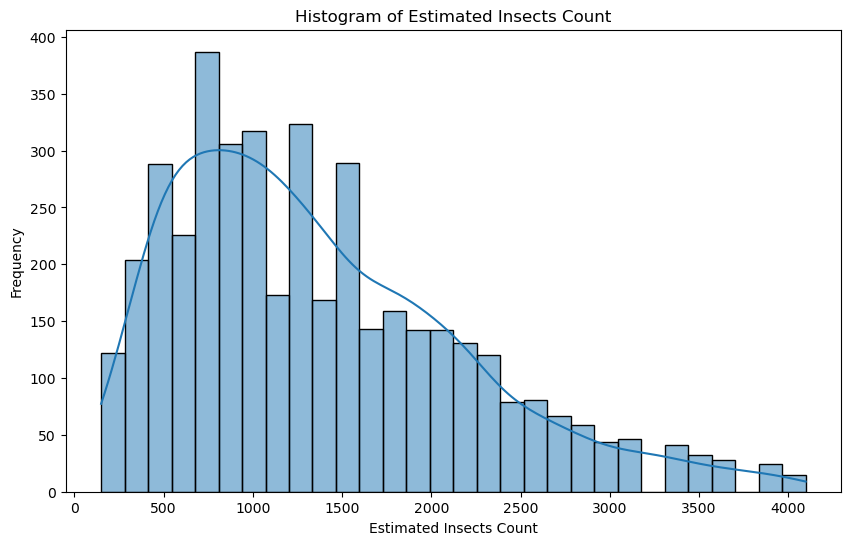

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Estimated_Insects_Count', bins=30, kde=True)
plt.title('Histogram of Estimated Insects Count')
plt.xlabel('Estimated Insects Count')
plt.ylabel('Frequency')
plt.show()

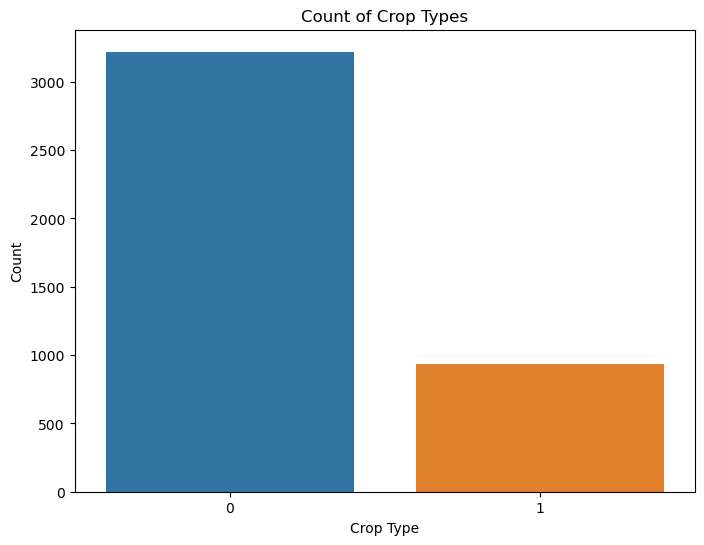

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Crop_Type')
plt.title('Count of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

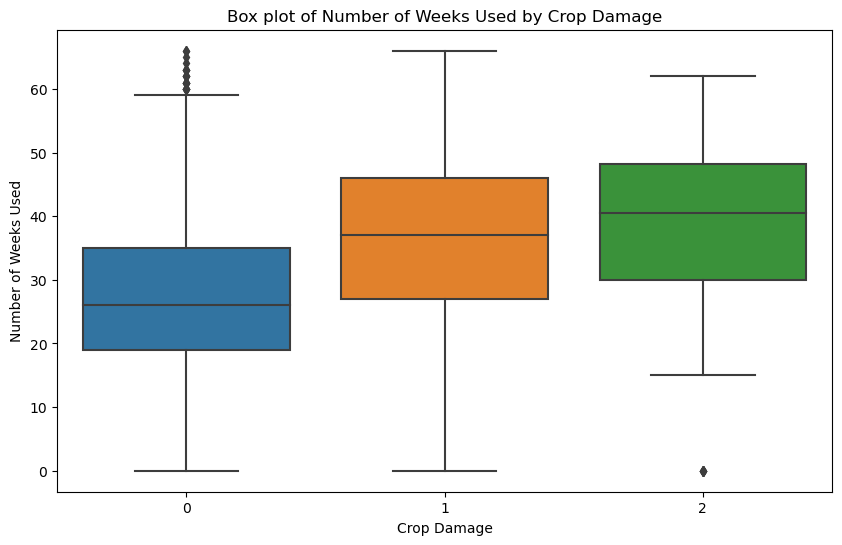

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Crop_Damage', y='Number_Weeks_Used')
plt.title('Box plot of Number of Weeks Used by Crop Damage')
plt.xlabel('Crop Damage')
plt.ylabel('Number of Weeks Used')
plt.show()

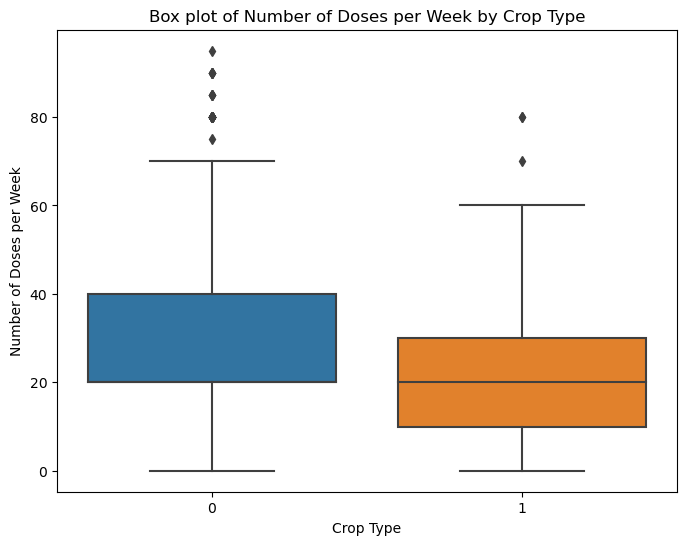

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='Crop_Type', y='Number_Doses_Week')
plt.title('Box plot of Number of Doses per Week by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Number of Doses per Week')
plt.show()

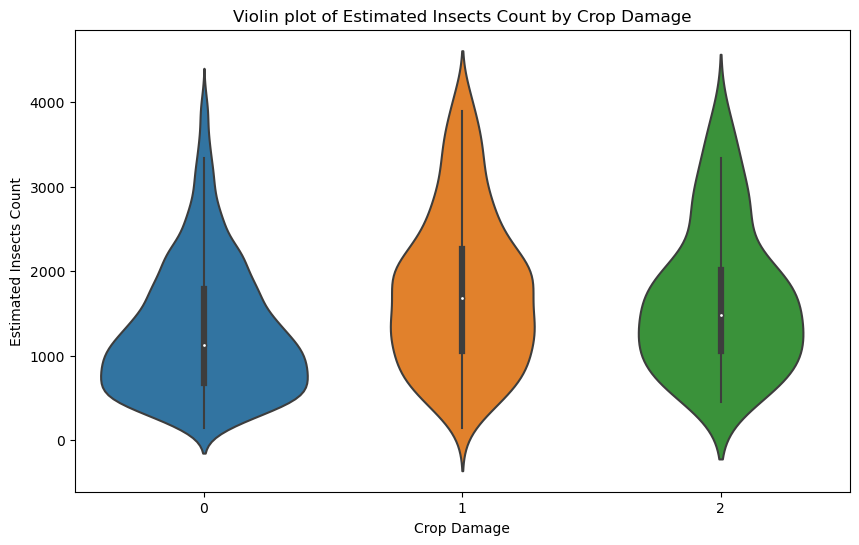

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train, x='Crop_Damage', y='Estimated_Insects_Count')
plt.title('Violin plot of Estimated Insects Count by Crop Damage')
plt.xlabel('Crop Damage')
plt.ylabel('Estimated Insects Count')
plt.show()

C:\Users\hbhar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

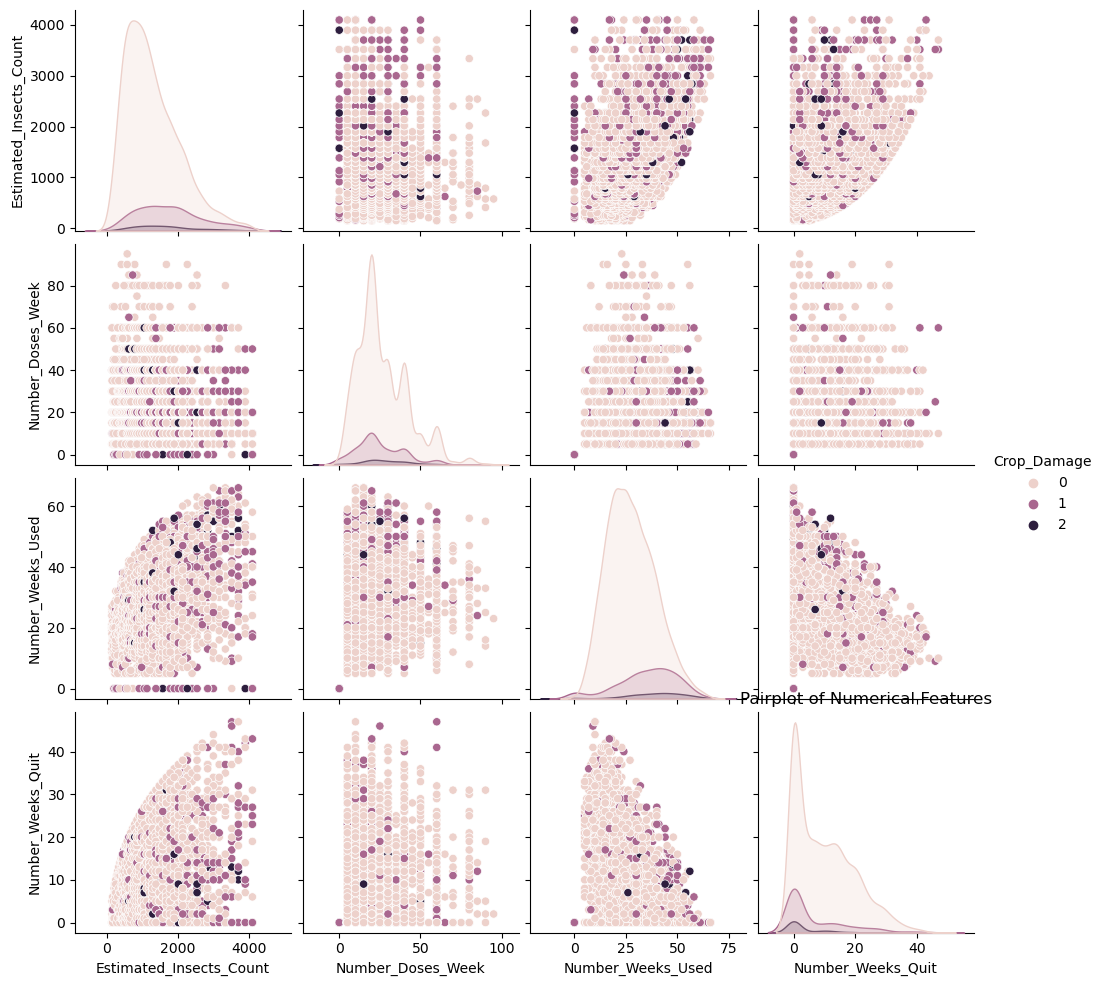

In [53]:
plt.figure(figsize=(10, 8))
sns.pairplot(train[['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Crop_Damage']], hue='Crop_Damage')
plt.title('Pairplot of Numerical Features')
plt.show()